In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
path = 'kodim19.png'
img_orig = np.asarray(Image.open(path))

(768, 512, 3)
0 255


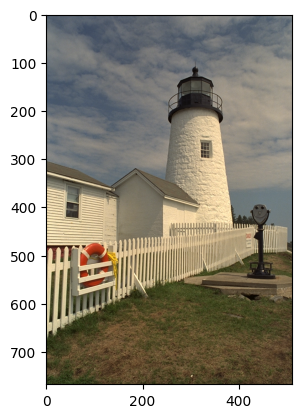

In [3]:
plt.imshow(img_orig)
print(img_orig.shape)
print(np.min(img_orig), np.max(img_orig))

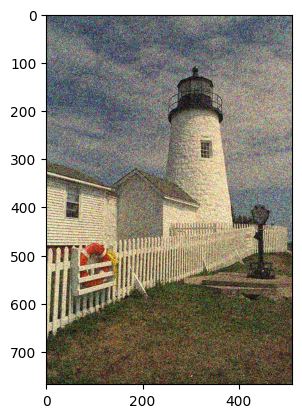

In [4]:
noise_std = 50
img_noisy = img_orig + np.random.randn(img_orig.shape[0], img_orig.shape[1], img_orig.shape[2]) * noise_std
img_noisy = np.floor(img_noisy).astype(int)
img_noisy[img_noisy < 0] = 0
img_noisy[img_noisy > 255] = 255
plt.imshow(img_noisy)

In [5]:
img_noisy_t = torch.Tensor(img_noisy).requires_grad_()
img_opt = torch.clone(img_noisy_t).detach().requires_grad_()

opt = torch.optim.Adam([img_opt], lr=1)
epochs = 500
alpha = 2

for epoch in range(epochs):
  opt.zero_grad()
  grad_x = torch.sum((img_opt[1:] - img_opt[:-1]) **2)
  grad_y = torch.sum((img_opt[:,1:] - img_opt[:,:-1]) **2)
  data_fidelity = torch.sum((img_opt - img_noisy_t) **2)
  loss = data_fidelity + alpha * (grad_x + grad_y)
  loss.backward()
  opt.step()
  if epoch%10==0:
    print(f"Epoch {epoch+1} of {epochs}: loss = {loss.item()}")

Epoch 1 of 500: loss = 21937405952.0
Epoch 11 of 500: loss = 15146306560.0
Epoch 21 of 500: loss = 10579220480.0
Epoch 31 of 500: loss = 7639600128.0
Epoch 41 of 500: loss = 5784623104.0
Epoch 51 of 500: loss = 4619693056.0
Epoch 61 of 500: loss = 3884657408.0
Epoch 71 of 500: loss = 3416021248.0
Epoch 81 of 500: loss = 3113301760.0
Epoch 91 of 500: loss = 2914941952.0
Epoch 101 of 500: loss = 2783017472.0
Epoch 111 of 500: loss = 2693941760.0
Epoch 121 of 500: loss = 2632877056.0
Epoch 131 of 500: loss = 2590374912.0
Epoch 141 of 500: loss = 2560341504.0
Epoch 151 of 500: loss = 2538800128.0
Epoch 161 of 500: loss = 2523124992.0
Epoch 171 of 500: loss = 2511559936.0
Epoch 181 of 500: loss = 2502916352.0
Epoch 191 of 500: loss = 2496380416.0
Epoch 201 of 500: loss = 2491386112.0
Epoch 211 of 500: loss = 2487535104.0
Epoch 221 of 500: loss = 2484542464.0
Epoch 231 of 500: loss = 2482202112.0
Epoch 241 of 500: loss = 2480363008.0
Epoch 251 of 500: loss = 2478911744.0
Epoch 261 of 500: lo

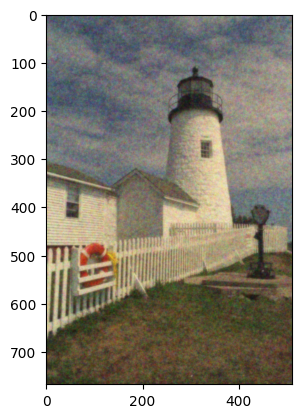

In [6]:
img_opt_2 = torch.clone(img_opt)
img_opt_2 = torch.floor(img_opt_2).to(torch.uint8)
plt.imshow(img_opt_2)

In [7]:
img_noisy_t = torch.Tensor(img_noisy).requires_grad_()
img_opt = torch.clone(img_noisy_t).detach().requires_grad_()

opt = torch.optim.Adam([img_opt], lr=1)
epochs = 500
alpha = 5

for epoch in range(epochs):
  opt.zero_grad()
  grad_x = torch.sum((img_opt[1:] - img_opt[:-1]) **2)
  grad_y = torch.sum((img_opt[:,1:] - img_opt[:,:-1]) **2)
  data_fidelity = torch.sum((img_opt - img_noisy_t) **2)
  loss = data_fidelity + alpha * (grad_x + grad_y)
  loss.backward()
  opt.step()
  if epoch%10==0:
    print(f"Epoch {epoch+1} of {epochs}: loss = {loss.item()}")

Epoch 1 of 500: loss = 54843514880.0
Epoch 11 of 500: loss = 37701853184.0
Epoch 21 of 500: loss = 25884751872.0
Epoch 31 of 500: loss = 18046492672.0
Epoch 41 of 500: loss = 12932199424.0
Epoch 51 of 500: loss = 9605297152.0
Epoch 61 of 500: loss = 7429860864.0
Epoch 71 of 500: loss = 5993092096.0
Epoch 81 of 500: loss = 5032645632.0
Epoch 91 of 500: loss = 4382369792.0
Epoch 101 of 500: loss = 3936400640.0
Epoch 111 of 500: loss = 3626631168.0
Epoch 121 of 500: loss = 3408748032.0
Epoch 131 of 500: loss = 3253578752.0
Epoch 141 of 500: loss = 3141694208.0
Epoch 151 of 500: loss = 3060011008.0
Epoch 161 of 500: loss = 2999625472.0
Epoch 171 of 500: loss = 2954418432.0
Epoch 181 of 500: loss = 2920144640.0
Epoch 191 of 500: loss = 2893830656.0
Epoch 201 of 500: loss = 2873376256.0
Epoch 211 of 500: loss = 2857282816.0
Epoch 221 of 500: loss = 2844472576.0
Epoch 231 of 500: loss = 2834161408.0
Epoch 241 of 500: loss = 2825774336.0
Epoch 251 of 500: loss = 2818886656.0
Epoch 261 of 500: 

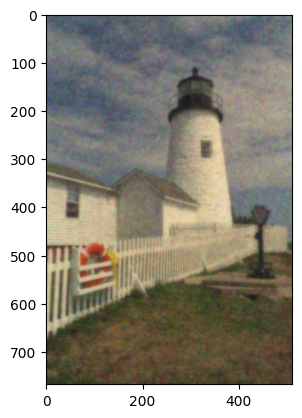

In [8]:
img_opt_5 = torch.clone(img_opt)
img_opt_5 = torch.floor(img_opt_5).to(torch.uint8)
plt.imshow(img_opt_5)

In [9]:
img_orig_t = torch.Tensor(img_orig).detach()
MSE_noisy = torch.mean((img_orig_t - img_noisy_t) **2)
PSNR_noisy = 20 * torch.log10(255.0 / torch.sqrt(MSE_noisy))
PSNR_noisy = round(PSNR_noisy.item(), 2)

MSE_opt_2 = torch.mean((img_orig_t - img_opt_2) **2)
PSNR_opt_2 = 20 * torch.log10(255.0 / torch.sqrt(MSE_opt_2))
PSNR_opt_2 = round(PSNR_opt_2.item(), 2)

MSE_opt_5 = torch.mean((img_orig_t - img_opt_5) **2)
PSNR_opt_5 = 20 * torch.log10(255.0 / torch.sqrt(MSE_opt_5))
PSNR_opt_5 = round(PSNR_opt_5.item(), 2)


print(f"Noisy image: PSNR={PSNR_noisy}")
print(f"Denoised image with alpha=2: PSNR={PSNR_opt_2}")
print(f"Denoised image with alpha=5: PSNR={PSNR_opt_5}")

Noisy image: PSNR=14.66
Denoised image with alpha=2: PSNR=23.36
Denoised image with alpha=5: PSNR=22.85


<ipython-input-9-8506d74cae76>:1: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img_orig_t = torch.Tensor(img_orig).detach()


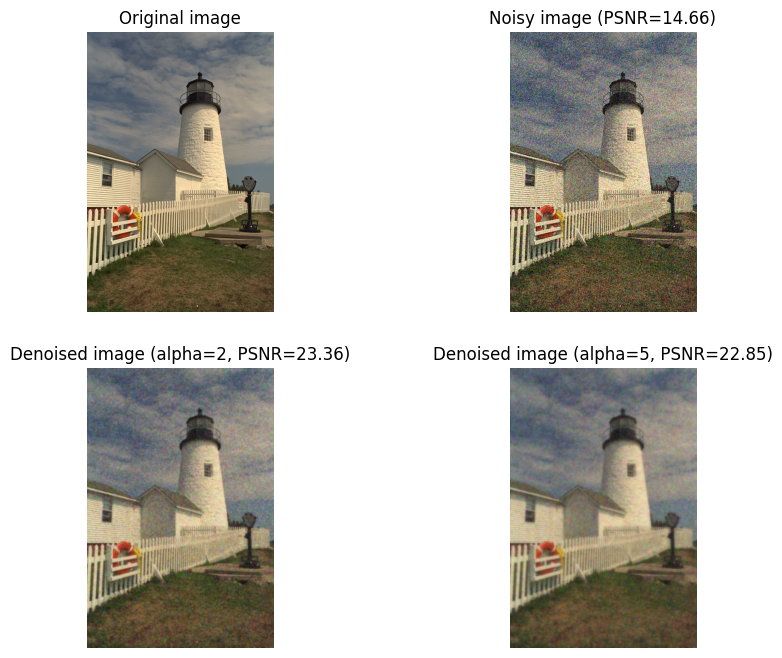

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(img_orig)
plt.title('Original image')
plt.axis('off')
plt.subplot(222)
plt.imshow(img_noisy)
plt.title(f'Noisy image (PSNR={PSNR_noisy})')
plt.axis('off')
plt.subplot(223)
plt.imshow(img_opt_2)
plt.title(f'Denoised image (alpha=2, PSNR={PSNR_opt_2})')
plt.axis('off')
plt.subplot(224)
plt.imshow(img_opt_5)
plt.title(f'Denoised image (alpha=5, PSNR={PSNR_opt_5})')
plt.axis('off')

plt.savefig('Denoising.pdf', bbox_inches='tight')